# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

![](../data/banknotes.png)

In [26]:
df = pd.read_csv('./data/banknotes.csv')

In [27]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [29]:
import seaborn as sns

/home/chengyu/anaconda3/envs/keras/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/chengyu/anaconda3/envs/keras/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


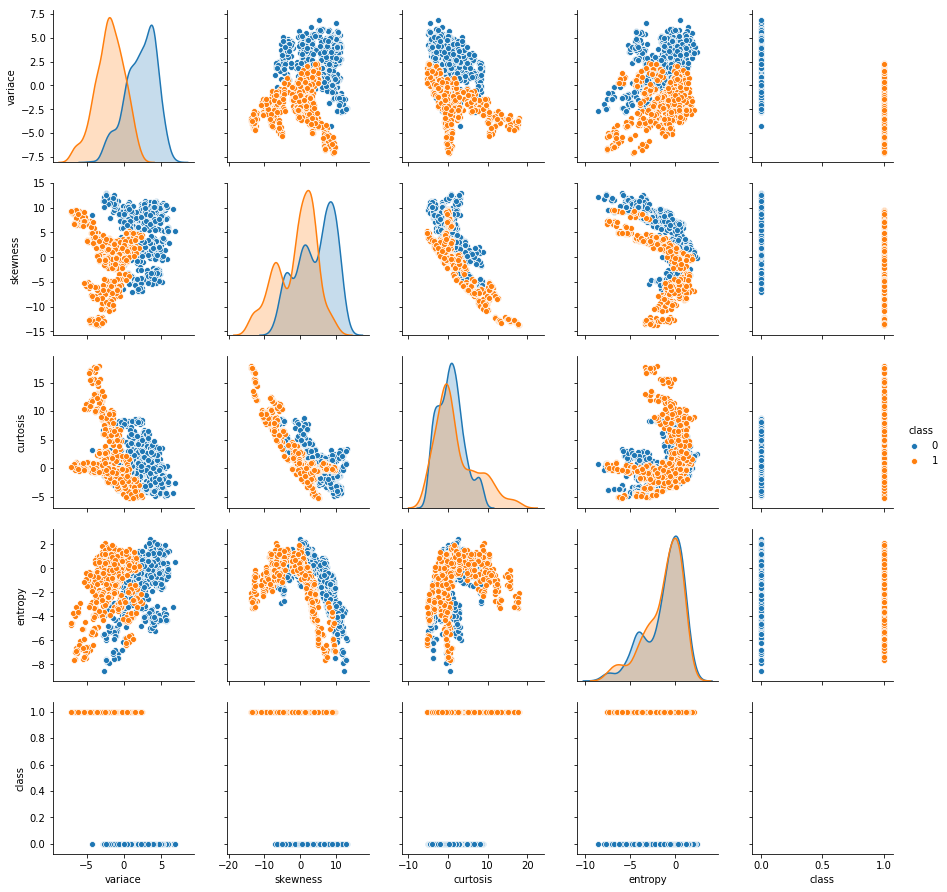

In [30]:
sns.pairplot(df, hue="class")

#### Baseline model

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [32]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [33]:
model = RandomForestClassifier()
cross_val_score(model, X, y) 

array([1.        , 0.99343545, 0.99343545])

### Logistic Regression Model

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [55]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [62]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=5,batch_size=12)
result = model.evaluate(X_test, y_test)

Epoch 1/5
960/960 [==============================] - 0s 268us/step - loss: 0.4595 - acc: 0.7771
Epoch 2/5
960/960 [==============================] - 0s 165us/step - loss: 0.4136 - acc: 0.8448
Epoch 3/5
960/960 [==============================] - 0s 157us/step - loss: 0.3801 - acc: 0.8802
Epoch 4/5
960/960 [==============================] - 0s 152us/step - loss: 0.3544 - acc: 0.8958
Epoch 5/5
412/412 [==============================] - 0s 82us/step


In [63]:
## record for each epoch
history.history

{'loss': [0.45950250811874865,
  0.41359064914286137,
  0.380138105712831,
  0.35442631114274264,
  0.3338119175285101],
 'acc': [0.777083333209157,
  0.8447916679084301,
  0.880208333581686,
  0.8958333365619182,
  0.9052083365619182]}

In [64]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5,1,'Test accuracy: 90.3 %')

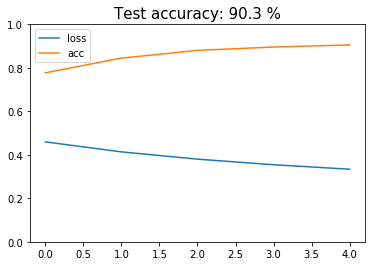

In [65]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [70]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()    ## clear previous session in memory 

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0,epochs=10)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [71]:
historydf = pd.concat(dflist, axis=1)

In [72]:
historydf

,loss,acc,loss,acc,loss,acc,loss,acc
0,0.823995,0.451042,0.710566,0.644792,0.634798,0.750000,0.336614,0.855208
1,0.742771,0.529167,0.391938,0.920833,0.295634,0.938542,0.132028,0.966667
2,0.681496,0.600000,0.312472,0.923958,0.228923,0.946875,0.097430,0.973958
3,0.633320,0.628125,0.269104,0.931250,0.190888,0.958333,0.081470,0.976042
4,0.593711,0.655208,0.239323,0.934375,0.165832,0.964583,0.071909,0.978125
5,0.560105,0.693750,0.216817,0.943750,0.147876,0.965625,0.065909,0.979167
6,0.530999,0.712500,0.198985,0.951042,0.134419,0.968750,0.061351,0.979167
7,0.505381,0.737500,0.184324,0.954167,0.123950,0.968750,0.057787,0.980208
8,0.482392,0.750000,0.172232,0.956250,0.115665,0.969792,0.055000,0.981250
9,0.461617,0.760417,0.161896,0.960417,0.108867,0.969792,0.052750,0.981250


In [73]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [74]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss       acc      loss       acc      loss       acc   
0              0.823995  0.451042  0.710566  0.644792  0.634798  0.750000   
1              0.742771  0.529167  0.391938  0.920833  0.295634  0.938542   
2              0.681496  0.600000  0.312472  0.923958  0.228923  0.946875   
3              0.633320  0.628125  0.269104  0.931250  0.190888  0.958333   
4              0.593711  0.655208  0.239323  0.934375  0.165832  0.964583   
5              0.560105  0.693750  0.216817  0.943750  0.147876  0.965625   
6              0.530999  0.712500  0.198985  0.951042  0.134419  0.968750   
7              0.505381  0.737500  0.184324  0.954167  0.123950  0.968750   
8              0.482392  0.750000  0.172232  0.956250  0.115665  0.969792   
9              0.461617  0.760417  0.161896  0.960417  0.108867  0.969792   

learning_rate      0.50            
metric             loss       acc  
0              0.336614  0.855208  
1              0.132028  0.966667  
2              0.097430  0.973958  
3              0.081470  0.976042  
4              0.071909  0.978125  
5              0.065909  0.979167  
6              0.061351  0.979167  
7              0.057787  0.980208  
8              0.055000  0.981250  
9              0.052750  0.981250

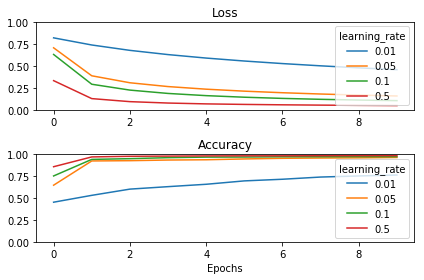

In [75]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [76]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0,epochs=10)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [77]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [78]:
historydf

batch_size       16                  32                  64             \
metric          loss       acc      loss       acc      loss       acc   
0           0.661010  0.661458  1.448583  0.257292  0.534680  0.750000   
1           0.620869  0.684375  1.275200  0.265625  0.513419  0.783333   
2           0.587308  0.706250  1.120280  0.284375  0.494589  0.827083   
3           0.558496  0.725000  0.985696  0.320833  0.477890  0.844792   
4           0.533171  0.740625  0.871405  0.377083  0.463029  0.867708   
5           0.510561  0.757292  0.776211  0.456250  0.449682  0.879167   
6           0.490140  0.770833  0.698208  0.526042  0.437677  0.883333   
7           0.471547  0.787500  0.634904  0.656250  0.426832  0.885417   
8           0.454371  0.801042  0.583677  0.761458  0.416971  0.890625   
9           0.438533  0.816667  0.542092  0.839583  0.407979  0.895833   

batch_size       128            
metric          loss       acc  
0           0.790540  0.472917  
1           0.778817  0.482292  
2           0.767455  0.490625  
3           0.756515  0.506250  
4           0.745906  0.517708  
5           0.735663  0.526042  
6           0.725816  0.539583  
7           0.716214  0.558333  
8           0.707000  0.567708  
9           0.698058  0.578125

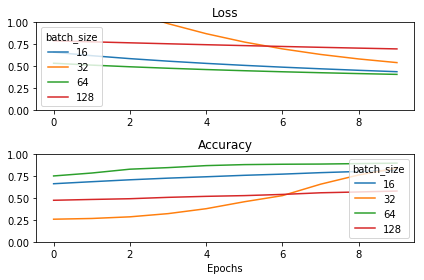

In [79]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [81]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [83]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name), ## this is a way to convert a string to code
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [84]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

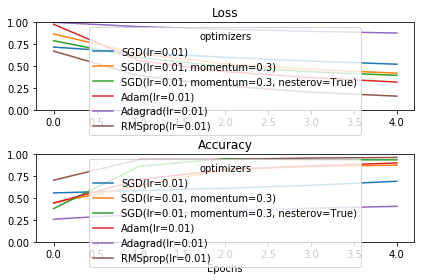

In [85]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [86]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [87]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

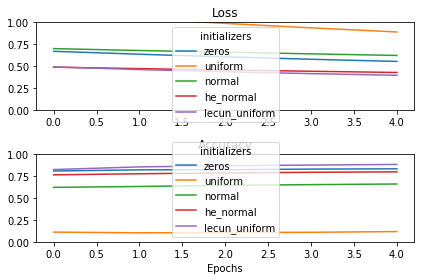

In [88]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [89]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s 397us/step - loss: 0.4560 - acc: 0.8125 - val_loss: 0.3962 - val_acc: 0.8924
Epoch 2/20
672/672 [==============================] - 0s 140us/step - loss: 0.3105 - acc: 0.9315 - val_loss: 0.2833 - val_acc: 0.9549
Epoch 3/20
672/672 [==============================] - 0s 145us/step - loss: 0.2245 - acc: 0.9628 - val_loss: 0.2038 - val_acc: 0.9792
Epoch 4/20
672/672 [==============================] - 0s 143us/step - loss: 0.1686 - acc: 0.9732 - val_loss: 0.1523 - val_acc: 0.9931
Epoch 5/20
672/672 [==============================] - 0s 159us/step - loss: 0.1315 - acc: 0.9762 - val_loss: 0.1212 - val_acc: 0.9861
Epoch 6/20
672/672 [==============================] - 0s 150us/step - loss: 0.1072 - acc: 0.9747 - val_loss: 0.0961 - val_acc: 0.9861
Epoch 7/20
672/672 [==============================] - 0s 149us/step - loss: 0.0911 - acc: 0.9807 - val_loss: 0.0809 - val_acc: 0.9861
Epoch 8/20
672/6

In [90]:
result

[0.034903392629716, 0.9902912621359223]

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.layers

#### Get node as tensor

In [93]:
inp = model.layers[0].input  ## get input and out as tensorflow tensors
out = model.layers[0].output ## get output of relu 

In [94]:
inp

<tf.Tensor 'dense_input:0' shape=(?, 4) dtype=float32>

In [95]:
out

<tf.Tensor 'dense/Relu:0' shape=(?, 2) dtype=float32>

#### Use those nodes for calculation

In [96]:
features_function = K.function([inp], [out])
features_function

In [97]:
features_function([X_test])[0].shape

(412, 2)

In [98]:
features = features_function([X_test])[0]

- we can see how the first layer transformed the vector space to seperate our data 

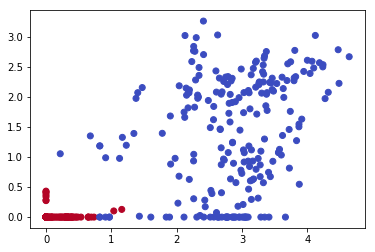

In [100]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

#### Let's try a deeper model

In [103]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

412/412 [==============================] - 0s 23us/step


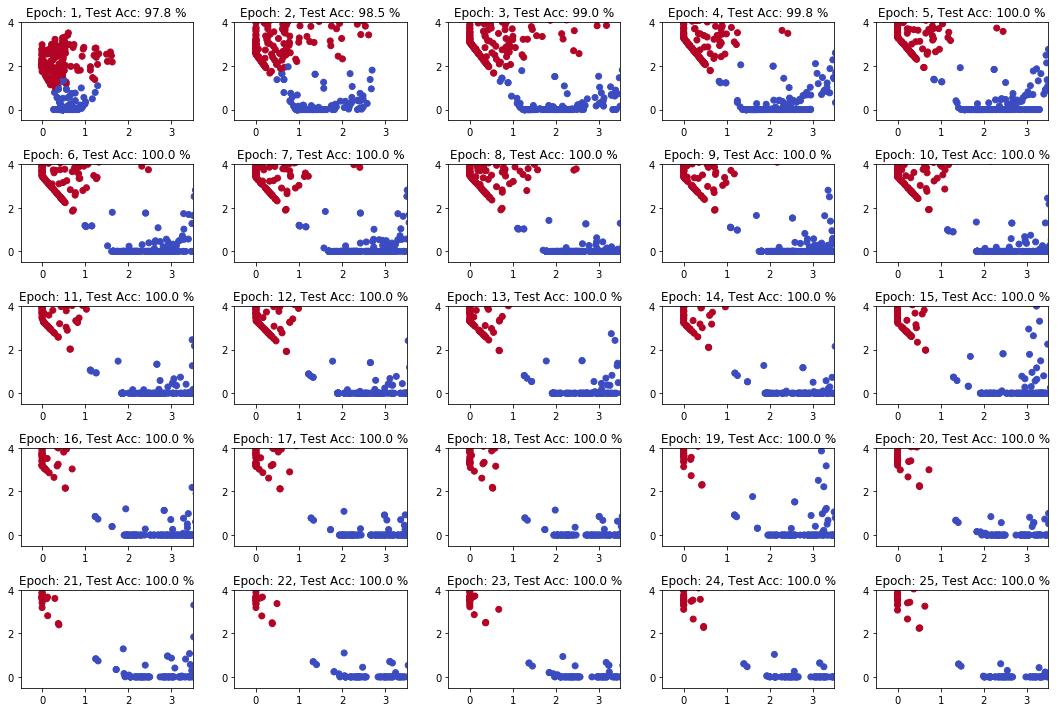

In [104]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

## now i do 1 epoch each loop 
for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard